# Car Price Prediction Project

Submitted By     :Sindhu Shree N

Internship Batch :19

The main goal of this project is to build a predictive model inorder to predict the car price for the provided dataset which helps automobile industries to improve their business.

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import r2_score
import pickle
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing the csv file and converting into dataframe
df=pd.read_csv("car_price.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [4]:
df.sample(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
5397,Hyundai i20 1.2 Sportz,2013,425000,23000,Petrol,Dealer,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
1889,Maruti Alto LXi,2006,120000,120000,Petrol,Individual,Manual,Fourth & Above Owner,19.7 kmpl,796 CC,46.3 bhp,62Nm@ 3000rpm,5.0
5884,Maruti Swift ZDi,2014,390000,90000,Diesel,Individual,Manual,Second Owner,22.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
4550,Hyundai Santro Xing GLS,2012,300000,40000,Petrol,Individual,Manual,Second Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5552,Hyundai Accent VIVA CRDi,2003,145000,120000,Diesel,Individual,Manual,Fourth & Above Owner,13.1 kmpl,1493 CC,82 bhp,187Nm@ 2500rpm,5.0


So we have both categorical and the numerical data.

In [5]:
#getting the number of rows and column in a dataset
df.shape

(8128, 13)

There are 8128 rows and 13 columns including target column.

In [6]:
# getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


So out of 13 features 9 are object type, 3 are integet type and 1 is float type data

In [7]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [8]:
#checking the number of missing values
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

We can clearly see that there are null values in 5 features which we handle in future.

In [9]:
# checking the distribution of some categorical data
print(df['fuel'].value_counts())
print(df['transmission'].value_counts())
print(df['seller_type'].value_counts())

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64
Manual       7078
Automatic    1050
Name: transmission, dtype: int64
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: seller_type, dtype: int64


Observations:
    
    1.Out of 8128 cars 4402 are Diesel cars, 3631 are running by petrol and 57,38 are running by CNG and LPG respectively.
    2.Out of 8128 cars 7078 are manual transmission type and 1050 are automatic transmission type.
    3.Out of 8128 cars 6766 are individual seller type, 1126 are dealer seller type and remaining 236 are Trustmark Dealer type.


In [9]:
#summary statistics
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


<AxesSubplot:>

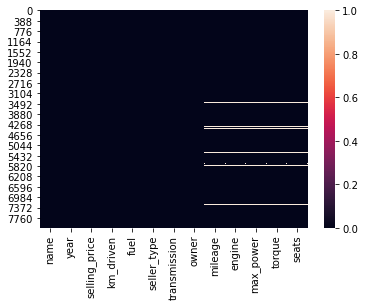

In [10]:
#visualising the null values through heatmap
sns.heatmap(df.isnull())

we can see there are some white skrikes which indicates the presence of null values.

<AxesSubplot:xlabel='mileage', ylabel='count'>

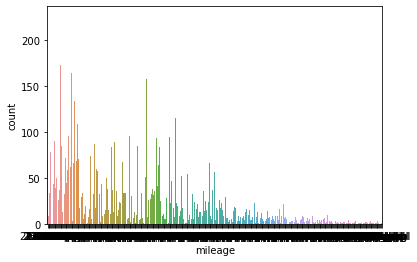

In [22]:
sns.countplot(df["mileage"])

Generally, max_power,engine,torque and seats doesnot contribute much to define a car price so we can drop those features.But mileage is directly proportional to price we will retain that feature in our dataset.

In [11]:
#dropping the unnecessary columns
df.drop(['max_power','engine','torque','seats'],axis=1,inplace=True)
df.shape

(8128, 9)

Handling missing values:

In [12]:
#filling the null values of mileage using mode
df['mileage'].fillna(df['mileage'].mode()[0],inplace=True) 

In [13]:
df['mileage'].isnull().sum().any()

False

In [14]:
#checking for null values
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
dtype: int64

So there are no null values hence our data is clean.

# visualization:

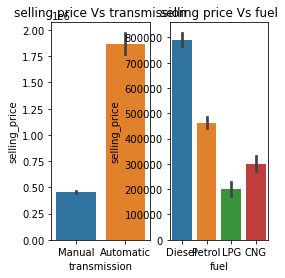

In [15]:
plt.subplot(1,3,2)
sns.barplot(df['transmission'],df['selling_price'])
plt.title('selling price Vs transmission')

plt.subplot(1,3,3)
sns.barplot(df['fuel'],df['selling_price'])
plt.title('selling price Vs fuel')

plt.show()

1.We can see that manual transmission has low price when compare to automatic transmission.

2.Deisel cars has more price when compared to other three which can go upto 8 lakh which is followed by petrol and CNG whose prices are atmost 5 lakh and 3 lakh respectively.

3.LPG fuel type cars has low price and its maximum price is 2 lakh.

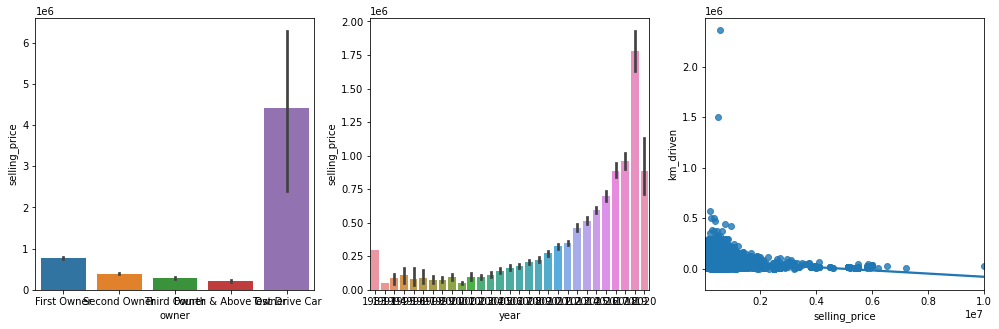

In [16]:
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.barplot(df['owner'],df['selling_price'])

plt.subplot(1,3,2)
sns.barplot(df['year'],df['selling_price'])

plt.subplot(1,3,3)
sns.regplot(df['selling_price'],df['km_driven'])
plt.show()

observations:
    
    1.We can in the first graph the test drive car has more selling price compare to other and followed by second hand one.and all other types has less price.
    2.In the second graph, if the car is old then its price is very less and if the car belongs to recent manufactured like in 2020 it has more price.
    3.By seeing the last graph, we can say if the car's driven kilometer is high it has low price compare to less kilometer runned one.

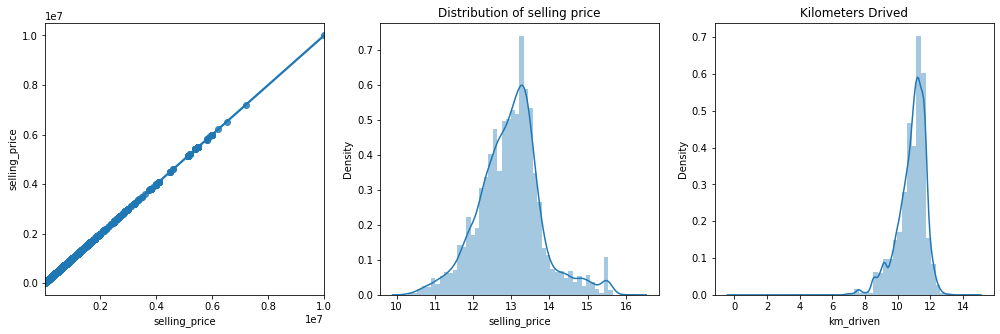

In [17]:
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.regplot(df['selling_price'],df['selling_price'])

plt.subplot(1,3,2)
sns.distplot(np.log(df['selling_price']))
plt.title('Distribution of selling price')


plt.subplot(1,3,3)
sns.distplot(np.log(df['km_driven']))
plt.title('Distribution of km_drived')


plt.title('Kilometers Drived')
plt.show()

By the above graphs we can say that selling price increases with increase in present price of cars.

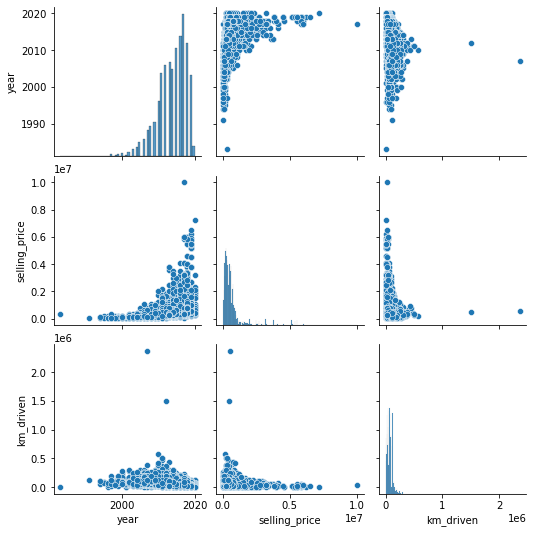

In [18]:
sns.pairplot(df)

# Encoding:

Since we have the categorical data we need to encode the data before model deployment.

In [19]:
#using label encoder to change the categorical data into numerical
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['selling_price']=LE.fit_transform(df['selling_price'])
df['fuel']=LE.fit_transform(df['fuel'])
df['km_driven']=LE.fit_transform(df['km_driven'])
df['seller_type']=LE.fit_transform(df['seller_type'])
df['transmission']=LE.fit_transform(df['transmission'])
df['owner']=LE.fit_transform(df['owner'])
df['mileage']=LE.fit_transform(df['mileage'])

In [20]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage
0,Maruti Swift Dzire VDI,2014,282,781,1,1,1,0,335
1,Skoda Rapid 1.5 TDI Ambition,2014,229,732,1,1,1,2,284
2,Honda City 2017-2020 EXi,2006,94,770,3,1,1,4,180
3,Hyundai i20 Sportz Diesel,2010,136,748,1,1,1,0,327
4,Maruti Swift VXI BSIII,2007,74,732,3,1,1,0,136


We can see that all the features except name has been encoded successfully.

# Correlation:

In [21]:
corr=df.corr()
corr

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage
year,1.000000,0.679424,-0.545018,-0.050312,-0.146042,-0.244707,-0.477249,0.318591
selling_price,0.679424,1.000000,-0.367909,-0.312129,-0.244890,-0.484090,-0.371201,-0.064746
km_driven,-0.545018,-0.367909,1.000000,-0.338240,0.160856,0.277742,0.376506,-0.180246
fuel,-0.050312,-0.312129,-0.338240,1.000000,0.110512,-0.035255,-0.022339,-0.047152
seller_type,-0.146042,-0.244890,0.160856,0.110512,1.000000,0.227871,0.143443,-0.014582
transmission,-0.244707,-0.484090,0.277742,-0.035255,0.227871,1.000000,0.147458,0.160956
owner,-0.477249,-0.371201,0.376506,-0.022339,0.143443,0.147458,1.000000,-0.163699
mileage,0.318591,-0.064746,-0.180246,-0.047152,-0.014582,0.160956,-0.163699,1.000000


<AxesSubplot:>

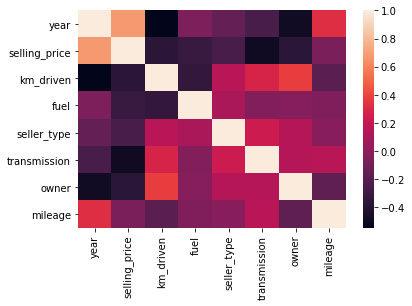

In [22]:
sns.heatmap(corr)

<AxesSubplot:>

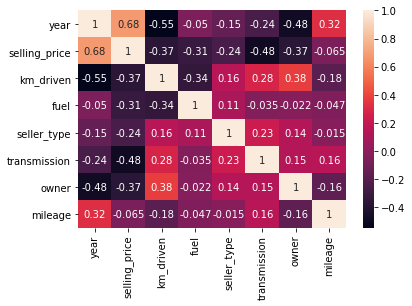

In [23]:
sns.heatmap(corr,annot=True)

The selling price is almost has positive correlation with all the features that we have specially with the year and mileage.

# Plotting Outliers:

<AxesSubplot:>

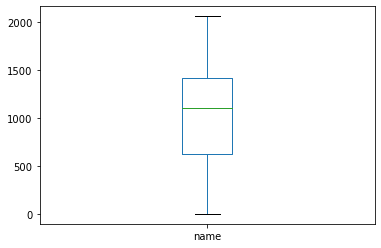

In [51]:
df['name'].plot.box()

name has no outliers.

<AxesSubplot:>

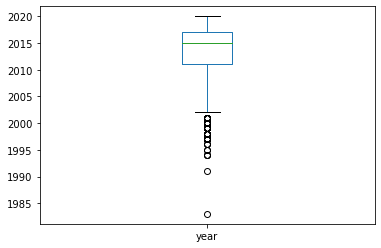

In [52]:
df['year'].plot.box()

year has some ouliers.

<AxesSubplot:>

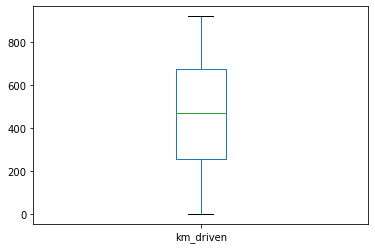

In [53]:
df['km_driven'].plot.box()

<AxesSubplot:>

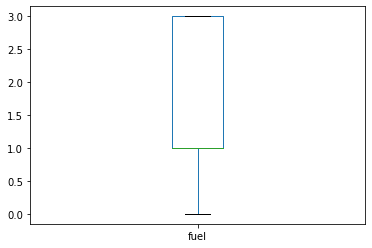

In [54]:
df['fuel'].plot.box()

Both the feature km_driven and fuel has no outliers.

<AxesSubplot:>

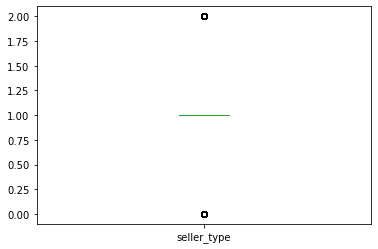

In [55]:
df['seller_type'].plot.box()

Seller type has some outlier.

<AxesSubplot:>

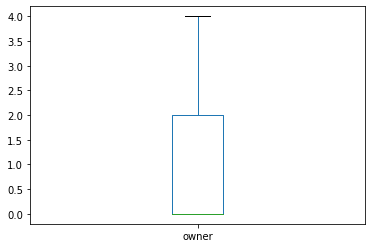

In [56]:
df['owner'].plot.box()

<AxesSubplot:>

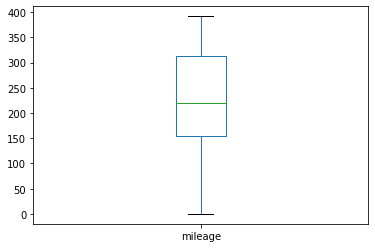

In [57]:
df['mileage'].plot.box()

Owner and mileage features has no outliers as visualised above.

<AxesSubplot:>

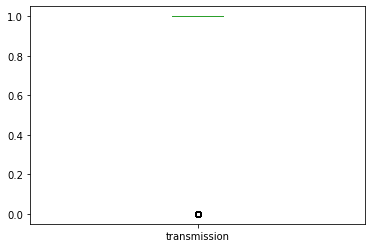

In [20]:
df['transmission'].plot.box()

Feature transmission has a outliers.

# Removing outliers:

In [24]:
#using zscore to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(df[['year','seller_type','transmission']]))
z

array([[0.04846419, 0.27760719, 0.3851584 ],
       [0.04846419, 0.27760719, 0.3851584 ],
       [1.9297752 , 0.27760719, 0.3851584 ],
       ...,
       [1.18793543, 0.27760719, 0.3851584 ],
       [0.19881574, 0.27760719, 0.3851584 ],
       [0.19881574, 0.27760719, 0.3851584 ]])

In [25]:
threshold=3
print(np.where(z>3))

(array([   7,  177,  186,  316,  774,  808,  999, 1025, 1045, 1216, 1379,
       1432, 1468, 1474, 1775, 1815, 1882, 1972, 2140, 2145, 2327, 2340,
       2424, 2818, 2886, 3046, 3097, 3310, 3378, 3890, 3919, 3922, 4033,
       4108, 4112, 4253, 4285, 4305, 4359, 4372, 4542, 4712, 4933, 5060,
       5080, 5322, 5349, 5385, 5411, 5451, 5610, 5681, 5702, 5714, 5726,
       5746, 5965, 5992, 6164, 6320, 6387, 6436, 6521, 6639, 6730, 6776,
       6919, 6920, 6933, 7218, 7471, 7524, 7765, 7846, 7935, 7958, 7982,
       7996, 8025, 8042, 8115], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))


In [26]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(8128, 9)
(8047, 9)


we can see that after removing outliers out data has reduced from 8128 rows to 8047 rows in which loss percentage is just 0.99 as obtained below.

In [27]:
loss_percent=(8128-8047)/8128*100
loss_percent

0.9965551181102362

Splitting the data:

In [28]:
x=df.drop(['name','selling_price'],axis=1)
y=df['selling_price']

Since feature 'name' was not concerned for determining the car price, it is just a brand name, so we can hold it without sending it to the training and testing purpose

In [29]:
#input features
x

,year,km_driven,fuel,seller_type,transmission,owner,mileage
0,2014,781,1,1,1,0,335
1,2014,732,1,1,1,2,284
2,2006,770,3,1,1,4,180
3,2010,748,1,1,1,0,327
4,2007,732,3,1,1,0,136
...,...,...,...,...,...,...,...
8123,2013,708,3,1,1,0,202
8124,2007,731,1,1,1,1,154
8125,2009,732,1,1,1,0,222
8126,2013,181,1,1,1,0,337


In [30]:
#target feature
y

0       282
1       229
2        94
3       136
4        74
       ... 
8123    199
8124     77
8125    238
8126    178
8127    178
Name: selling_price, Length: 8128, dtype: int64

In [49]:
x=df.drop('selling_price',axis=1)
y=df['selling_price']

Checking and removing the skewness:

In [66]:
df.skew()

name            -0.052374
year            -1.072293
selling_price    0.401133
km_driven       -0.158299
fuel             0.177285
seller_type     -0.930304
owner            1.258876
mileage         -0.245270
dtype: float64

In [69]:
from sklearn.preprocessing import power_transform
power_transform(x,method="yeo-johnson")

array([[ 0.48669021,  0.00404491,  1.32269332, ...,  0.20685664,
        -0.7302456 ,  1.12792942],
       [ 0.98402345,  0.00404491,  1.13893483, ...,  0.20685664,
         1.33901895,  0.61284439],
       [-1.22346854, -1.88994752,  1.28161323, ...,  0.20685664,
         1.56724811, -0.43939033],
       ...,
       [ 0.50696262, -1.21987832,  1.13893483, ...,  0.20685664,
        -0.7302456 , -0.01410078],
       [ 1.132963  , -0.25202195, -1.1396691 , ...,  0.20685664,
        -0.7302456 ,  1.14811873],
       [ 1.132963  , -0.25202195, -1.1396691 , ...,  0.20685664,
        -0.7302456 ,  1.14811873]])

Scaling the data:

In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(x)
scaled

array([[ 0.04846419,  1.37989831, -0.88911544, ...,  0.3851584 ,
        -0.66663908,  1.12894354],
       [ 0.04846419,  1.17312743, -0.88911544, ...,  0.3851584 ,
         0.97059991,  0.61235944],
       [-1.9297752 ,  1.33348036,  1.10639203, ...,  0.3851584 ,
         2.6078389 , -0.44106698],
       ...,
       [-1.18793543,  1.17312743, -0.88911544, ...,  0.3851584 ,
        -0.66663908, -0.01564477],
       [-0.19881574, -1.15198995, -0.88911544, ...,  0.3851584 ,
        -0.66663908,  1.14920174],
       [-0.19881574, -1.15198995, -0.88911544, ...,  0.3851584 ,
        -0.66663908,  1.14920174]])

In [31]:
#splitting the dataset to training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

Now we will use regression algorithms.

# Linear Regression:

In [119]:
lr=LinearRegression()

In [120]:
lr.fit(x_train,y_train)

LinearRegression()

Model evaluation:

In [121]:
training_data_prediction=lr.predict(x_train)

In [122]:
from sklearn.metrics import r2_score
error=r2_score(y_train,training_data_prediction)
print("R squared error :",error)

R squared error : 0.7209171822160665


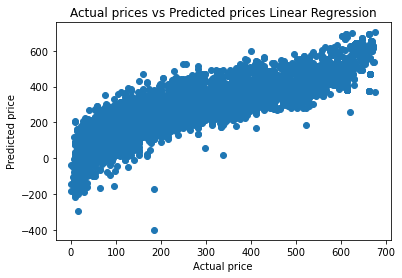

In [123]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual prices vs Predicted prices Linear Regression")
plt.show()

training data that we have predicted and actual are almost close which is clearly seen in the above graph but it has slight difference near 1.8 lakh to 6.5 lakh 

In [124]:
testing_data_prediction=lr.predict(x_test)

In [125]:
error=r2_score(y_test,testing_data_prediction)
print("R squared error :",error)

R squared error : 0.7099296785331048


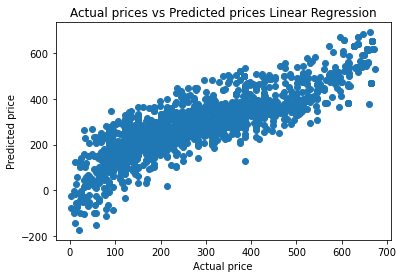

In [126]:
plt.scatter(y_test,testing_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual prices vs Predicted prices Linear Regression")
plt.show()

There is no much closeness between predicted and actual prices in the testing data.

# Lasso Regression:

In [127]:
from sklearn.linear_model import Lasso

In [128]:
lasso=Lasso()

In [129]:
lasso.fit(x_train,y_train)

Lasso()

Model evaluation

In [130]:
training_data_prediction=lasso.predict(x_train)

In [131]:
error=r2_score(y_train,training_data_prediction)
print("R Squared Error:",error)

R Squared Error: 0.7203470866688835


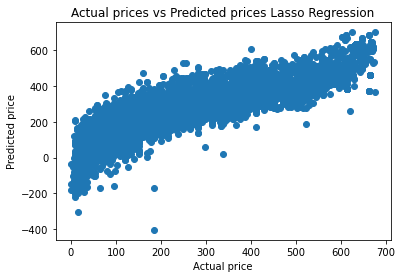

In [132]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual prices vs Predicted prices Lasso Regression")
plt.show()

Lasso has some comparative predicted and actual prices but near 1.9 lakh it is differed.

In [133]:
testing_data_prediction=lasso.predict(x_test)

In [134]:
error=r2_score(y_test,testing_data_prediction)
print("R squared error :",error)

R squared error : 0.7093647201246074


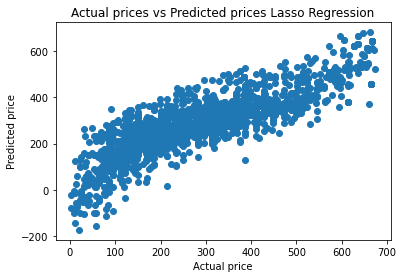

In [136]:
plt.scatter(y_test,testing_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual prices vs Predicted prices Lasso Regression")
plt.show()

Testing data predicted and actual prices are comparitively close but we are not finding any straight line like graph.

Also Linear and Lasso both regressors R squared score is not that good which is just 70 and 72 percent.

# Gradient Boosting Regressor:

In [137]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()

In [138]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [139]:
training_data_prediction=gbr.predict(x_train)

In [140]:
error=r2_score(y_train,training_data_prediction)
print("R Squared Error:",error)

R Squared Error: 0.8377380199926404


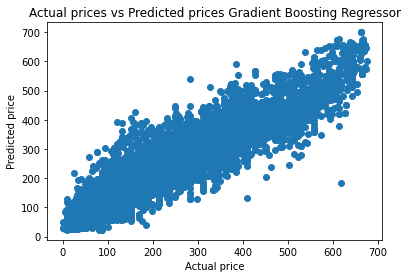

In [141]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual prices vs Predicted prices Gradient Boosting Regressor")
plt.show()

In [142]:
testing_data_prediction=gbr.predict(x_test)

In [143]:
error=r2_score(y_test,testing_data_prediction)
print("R Squared Error:",error)

R Squared Error: 0.8137112535617101


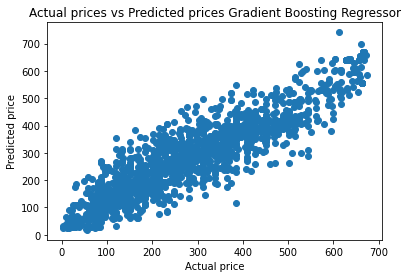

In [144]:
plt.scatter(y_test,testing_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual prices vs Predicted prices Gradient Boosting Regressor")
plt.show()

Training and Testing data graphs drawn for predicted and actual prices has some similarities but not that much close. And r2 score is good when compare to previous models.

# Random Forest Regressor:

In [145]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [146]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [147]:
training_data_prediction=rf.predict(x_train)

In [148]:
error=r2_score(y_train,training_data_prediction)
print("R Squared Error:",error)

R Squared Error: 0.9834730297126856


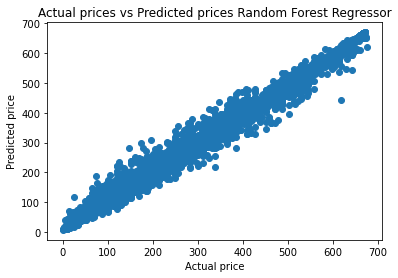

In [149]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual prices vs Predicted prices Random Forest Regressor")
plt.show()

In [150]:
testing_data_prediction=rf.predict(x_test)

In [151]:
error=r2_score(y_test,testing_data_prediction)
print("R Squared Error:",error)

R Squared Error: 0.8822755109848722


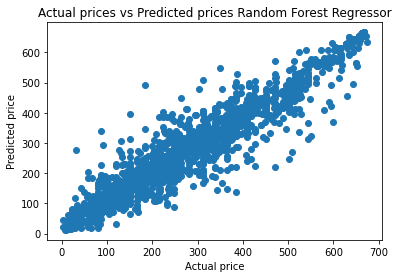

In [152]:
plt.scatter(y_test,testing_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual prices vs Predicted prices Random Forest Regressor")
plt.show()

We can see slightly straight line which is called a linear graph in this model and obtained r2 score is good but has little large difference compare to training and testing set

# XGB Regressor:

In [32]:
import xgboost as xgb
xg=xgb.XGBRegressor()

In [33]:
xg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
training_data_prediction=xg.predict(x_train)

In [35]:
error=r2_score(y_train,training_data_prediction)
print("R Squared Error:",error)

R Squared Error: 0.9620008198398995


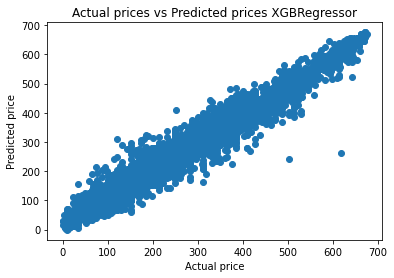

In [36]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual prices vs Predicted prices XGBRegressor")
plt.show()

In [37]:
testing_data_prediction=xg.predict(x_test)

In [38]:
error=r2_score(y_test,testing_data_prediction)
print("R Squared Error:",error)

R Squared Error: 0.8976484371389799


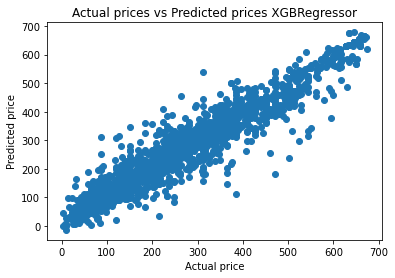

In [39]:
plt.scatter(y_test,testing_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual prices vs Predicted prices XGBRegressor")
plt.show()

In this case we can see that both training and testing graphs has very close predicted and actual prices and also approximately near r2 scores.

# Cross validation score:

In [108]:
print(cross_val_score(lr,x,y,cv=5).mean()*100)

71.6777017136089


In [109]:
print(cross_val_score(lasso,x,y,cv=5).mean()*100)

71.61604414609852


In [110]:
print(cross_val_score(gbr,x,y,cv=5).mean()*100)

82.43256585210543


In [40]:
print(cross_val_score(xg,x,y,cv=5).mean()*100)

90.21187840787289


In [112]:
print(cross_val_score(rf,x,y,cv=5).mean()*100)

88.7732707734476


Out of all these five models xgboost is having a good r2 score with almost same cross validation score so we will choose this model for hyperparameter tuning.

# Hyper parameter Tuning:

In [41]:
#we will use gridsearchcv for tuning
from sklearn.model_selection import GridSearchCV

In [42]:
#getting the parameters for tuning
xg.get_params()

{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 4,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [43]:
#opting some best parameters and tuning 
param_grid = dict(
    n_jobs=[16],
    learning_rate=[0.1, 0.5],
    objective=['reg:squarederror'],
    max_depth=[5, 10, 15], 
    n_estimators=[100, 500, 1000],
)
model = xgb.XGBRegressor(random_state=1, verbosity=1)     

grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring='neg_root_mean_squared_error',
                           )

best_model = grid_search.fit(x_train, y_train)
print('Optimum parameters', best_model.best_params_)

Optimum parameters {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 1000, 'n_jobs': 16, 'objective': 'reg:squarederror'}


In [46]:
#using the optimum parameters
regressor = xgb.XGBRegressor(
    learning_rate=0.1,
    max_depth=5,
    n_estimators=1000,
    n_jobs=16,
    objective='reg:squarederror',
)
model = regressor.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(r2_score(y_test,y_pred)*100)

90.52805843243993


We can see that there is a improved r2 score. since cross validation score is 90.21 now it has increased by 0.33 i.e.,90.53 is the score after tuning.

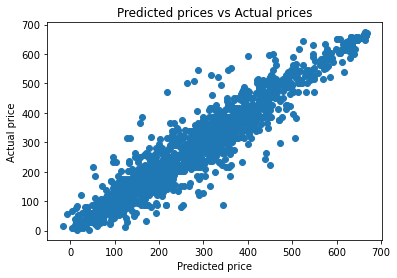

In [47]:
plt.scatter(y_pred,y_test)
plt.xlabel("Predicted price")
plt.ylabel("Actual price")
plt.title("Predicted prices vs Actual prices")
plt.show()

Finally, Plotting a graphs for predicted and the actual prices.

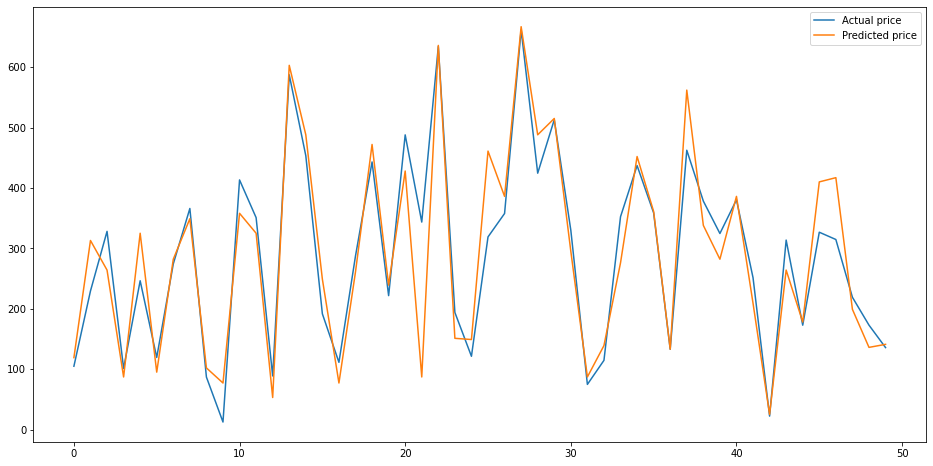

In [51]:
test = pd.DataFrame({'Predicted price':y_pred, 'Actual price':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual price','Predicted price'])

# Further evaluation

In [53]:
Final_mod = xgb.XGBRegressor()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
print(r2_score(y_test,pred)*100)

89.76484371389799


# Saving the best model:

In [54]:
import joblib
joblib.dump(Final_mod,"FinalModle.pkl")

['FinalModle.pkl']

# Conclusion:

In [56]:
preds = xg.predict(x_test)
dataframe=pd.DataFrame({})
dataframe['Predicted price']=preds
dataframe['Actual price']=y_test.values
print(dataframe)

      Predicted price  Actual price
0          306.812744           321
1          167.871628           185
2          200.083313           237
3          277.679169           328
4          208.589127           206
...               ...           ...
6497       240.864380           297
6498       294.478088           328
6499       319.230743           354
6500       422.194275           438
6501        46.689995            91

[6502 rows x 2 columns]


Hence the test and train data are balanced with r2 score of 89.76%.